# **Bone age Prediction: Deep CNN Approaches for predicting bone age from hand X-ray radiographs**

Atefe Rostami

July 2025

# **Preprocessing**

Preprocessing Data
We start by importing the necessary libraries, including OpenCV for image processing, Mediapipe for hand detection, and NumPy for array manipulations.

The handRec function uses Mediapipe's hand detection to locate hands in an image and crops out empty spaces around the detected hand. This reduces the image size to focus on the area of interest

CLAHE enhances the contrast of an image by applying histogram equalization in small regions. This function converts the image to LAB color space, applies CLAHE to the L channel (lightness), and merges the channels back to obtain the enhanced image

The resize function resizes the cropped image to a square with dimensions specified by the user (output_size). This ensures all images have a uniform size, which is necessary for model training

We finally convert RGB color space to GrayScale

We do this operations locally using OpenCV because TensorFlow cannot directly work with NumPy objects in its computational graph, and there is no CLAHE implementation in TensorFlow and Kaggle CPUs are not very fast

In [2]:
# from scipy import ndimage
# import mediapipe as mp
# import numpy as np
# import time
# import sys
# import cv2
# import os
# import platform
import os
import time
import psutil
import re
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2025-06-29 15:11:45.763683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751209905.966454      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751209906.029061      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


***Note**: This is already completed for this project. If you wish to change the hyperparameters, you must rerun Part One, which will take around 4 hours to train both networks. Otherwise, you can proceed to Part Two.*

In [3]:
# def clahe3(image, clip_limit=2.0, tile_grid_size=(8, 8)):
#     lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
#     l, a, b = cv2.split(lab)
#     clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
#     l = clahe.apply(l)
#     lab = cv2.merge((l, a, b))
#     result = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
#     return result


# def handRec(img):
#     global suc
#     result = Hands.process(img)
#     h, w, c = img.shape
#     hand_landmarks = result.multi_hand_landmarks
#     x_max = 0
#     x_min = w
#     y_min = h
#     if hand_landmarks:
#         for handLMs in hand_landmarks:
#             x_max = 0
#             x_min = w
#             y_min = h
#             for lm in handLMs.landmark:
#                 x, y = int(lm.x * w), int(lm.y * h)
#                 if x > x_max:
#                     x_max = x
#                 if x < x_min:
#                     x_min = x
#                 if y < y_min:
#                     y_min = y
#         offset = int((h * offset_percent) / 100)
#         y_min_new = y_min - offset
#         x_min_new = x_min - offset
#         x_max_new = x_max + offset
#         if (y_min_new < 0):
#             y_min_new = 0
#         if (x_min_new < 0):
#             x_min_new = 0
#         if (x_max_new > w):
#             x_max_new = w
#         suc += 1
#         return img[y_min_new:h, x_min_new:x_max_new]
#     else:
#         return img


# def resize(img):
#     height, width = img.shape[:2]
#     max_dim = max(height, width)
#     square_img = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
#     x_pad = (max_dim - width) // 2
#     y_pad = (max_dim - height) // 2
#     square_img[y_pad:y_pad + height, x_pad:x_pad + width] = img
#     resized = cv2.resize(square_img, (output_size, output_size),
#                          interpolation=cv2.INTER_AREA)
#     return resized


# def _print():
#     now = time.time() - start_time
#     print("%c[%d;%df" % (0x1B, 0, 0), end='')
#     print(
#         "PREPROCESS ON HAND X-RAY IMAGES  |  2023"
#         "\nInput directory:  ", image_dir, "\nOutput directory: ", output_dir,
#         "\nOutput Size: ", output_size,
#         ("px | 3" if output_channel == 1 else "px | 1"), "Output channels ",
#         "\nRunning time: %02d:%05.02f" % (int(now / 60), now % 60),
#         f"\nproccessed images: %s/%s (%%%s)" %
#         (count, img_count, int(
#             (count / img_count * 100))), "  \nHand detection succsess rate: %",
#         int(suc / count * 100), "   ")


# hands = mp.solutions.hands
# Hands = hands.Hands()
# offset_percent = 5  # offset percentage for croping the detected hand
# rotation_percent = 20  # offset percentage for hand straightening
# count = 0  # count of images which has been processed
# suc = 0  # count of images wihcn successfully found a hand in it

# if (len(sys.argv) < 2):
#     print("You should give the input directory as an argument!",
#           "\nExample: py preProcess.py \'...path_to_images\'")
#     exit(0)
# image_dir = os.path.abspath(str(
#     sys.argv[1][:-1]))  # path to the directory containing the images
# if (str(platform.system()).lower() == "windows"):
#     output_dir = os.path.abspath(os.path.join(
#         image_dir, os.pardir)) + "\\" + os.path.basename(
#             image_dir) + " (preprocessed)\\"  # path to the output directory
# else:
#     output_dir = os.path.abspath(os.path.join(
#         image_dir, os.pardir)) + "/" + os.path.basename(
#             image_dir) + " (preprocessed)/"  # path to the output directory

# if not os.path.exists(output_dir):
#     os.mkdir(output_dir)
# img_count = len([  # number of total images in the <image_dir> directory
#     entry for entry in os.listdir(image_dir)
#     if os.path.isfile(os.path.join(image_dir, entry))
# ])
# output_size = int(input("Output size (ex: 256) :\n"))
# output_channel = int(
#     input(
#         "Output channels :\n 1) RGB (3channels)\n 2) Grayscale (1channel)\n"))

# os.system('cls')
# start_time = time.time()
# for filename in os.listdir(image_dir):
#     count += 1
#     img = cv2.imread(os.path.join(image_dir, filename))
#     if (img is None):
#         print("couldn't open image!")
#     else:
#         img = handRec(img)  # detect the hand for croping the image
#         img = clahe3(img)  # adjust the brightness and contrast of the image
#         img = resize(img)  # resize the image to <output_size>
#         if output_channel == 2:
#             img = cv2.cvtColor(
#                 img, cv2.COLOR_BGR2GRAY)  # Reduce the channels from 3 to 1
#         cv2.imwrite(os.path.join(output_dir, filename), img)  # save
#         _print()

# Training Phase**

## Normalizing column names

In [4]:
def create_dataset_dataframe(directory: str, labels_dict: dict) -> pd.DataFrame:

    records = []
    for fname in os.listdir(directory):
        # Only consider common image extensions
        if not re.search(r"\.(png|jpg|jpeg|bmp|tif|tiff)$", fname, flags=re.IGNORECASE):
            continue

        # Extract the first sequence of digits from the filename
        m = re.search(r"(\d+)", fname)
        if not m:
            continue

        case_id = int(m.group(1))
        if case_id not in labels_dict:
            # Skip if this ID has no corresponding label entry
            continue

        male, age = labels_dict[case_id]
        img_path = os.path.join(directory, fname)
        records.append({
            "image_path": img_path,
            "male":        int(male),
            "age":         float(age)
        })

    # Build DataFrame (sorted by case_id for convenience)
    df = pd.DataFrame(records)
    # Sort by numeric ID extracted from filename
    df["numeric_id"] = df["image_path"].apply(lambda p: int(re.search(r"(\d+)", os.path.basename(p)).group(1)))
    df = df.sort_values("numeric_id").drop(columns=["numeric_id"]).reset_index(drop=True)
    return df

In [5]:
# Define paths
dir_root = '/kaggle/input/boneage-set/'

# Sub-folders for images:
training_images_folder   = os.path.join(dir_root, 'Bone Age Training Set')  # e.g. '/kaggle/.../Bone Age Training Set/Data'
validation_images_folder = os.path.join(dir_root, 'Bone Age Validation Set')
test_images_folder       = os.path.join(dir_root, 'Bone Age Test Set')

# Label files (CSV) in each subfolder:
training_labels_path   = os.path.join(dir_root, 'Bone Age Training Set',   'Data', 'labels.csv')
validation_labels_path = os.path.join(dir_root, 'Bone Age Validation Set', 'Data', 'labels.csv')
test_labels_path       = os.path.join(dir_root, 'Bone Age Test Set',       'Data', 'labels.csv')

# Sanity-check that the files/folders actually exist 
for name, path in [
    ("train images folder",       training_images_folder),
    ("validation images folder",  validation_images_folder),
    ("test images folder",        test_images_folder),
    ("train labels CSV",          training_labels_path),
    ("validation labels CSV",     validation_labels_path),
    ("test labels CSV",           test_labels_path),
]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{name!r} not found at: {path}")

# Read each CSV and print its columns (for debugging)
train_df   = pd.read_csv(training_labels_path)
valid_df   = pd.read_csv(validation_labels_path)
test_df    = pd.read_csv(test_labels_path)

print("TRAIN   columns:", train_df.columns.tolist())
print("VALID   columns:", valid_df.columns.tolist())
print("TEST    columns:", test_df.columns.tolist())

# Normalize each DataFrame into ['case_id', 'male', 'age'] 

def normalize_train(df: pd.DataFrame) -> pd.DataFrame:
    """
    Input columns: ['id', 'boneage', 'male']
    - 'id'    → rename to 'case_id'
    - 'boneage' → rename to 'age'
    - 'male' is already 0/1, so just rename to 'male'
    """
    df = df.rename(columns={
        'id':      'case_id',
        'boneage': 'age',
        'male':    'male'
    })
    # Keep only the three columns (this also enforces integer types if possible):
    df = df[['case_id', 'male', 'age']].astype({'case_id': int, 'male': int, 'age': float})
    return df

def normalize_validation(df: pd.DataFrame) -> pd.DataFrame:
    """
    Input columns: ['Image ID', 'male', 'Bone Age (months)']
    - 'Image ID'            → rename to 'case_id'
    - 'male'                → already 0/1, just keep as 'male'
    - 'Bone Age (months)'   → rename to 'age'
    """
    df = df.rename(columns={
        'Image ID':            'case_id',
        'male':                'male',
        'Bone Age (months)':   'age'
    })
    df = df[['case_id', 'male', 'age']].astype({'case_id': int, 'male': int, 'age': float})
    return df

def normalize_test(df: pd.DataFrame) -> pd.DataFrame:
    """
    Input columns: ['Case ID', 'Sex', 'Ground truth bone age (months)']
    - 'Case ID'                       → rename to 'case_id'
    - 'Sex'  ('M'/'F')                → map to new 'male' (M→1, F→0)
    - 'Ground truth bone age (months)' → rename to 'age'
    """
    # First map 'Sex' → 'male':
    df['male'] = df['Sex'].map({'M': 1, 'F': 0}).astype(int)
    
    df = df.rename(columns={
        'Case ID':                           'case_id',
        'Ground truth bone age (months)':    'age'
    })
    # Now drop the original 'Sex' column; keep only ['case_id', 'male', 'age']
    df = df[['case_id', 'male', 'age']].astype({'case_id': int, 'male': int, 'age': float})
    return df

train_df   = normalize_train(train_df)
valid_df   = normalize_validation(valid_df)
test_df    = normalize_test(test_df)

# Sanity‐check:
print("\nAFTER normalization:")
print("TRAIN   columns now:", train_df.columns.tolist(),  " | dtypes:", train_df.dtypes.to_dict())
print("VALID   columns now:", valid_df.columns.tolist(),  " | dtypes:", valid_df.dtypes.to_dict())
print("TEST    columns now:", test_df.columns.tolist(),   " | dtypes:", test_df.dtypes.to_dict())

# Step 4: Convert each DataFrame into a dict {case_id: [male, age], …}

def make_label_dict(df: pd.DataFrame) -> dict:
    """
    Creates a dict mapping: case_id → [male, age]
    from a DataFrame that must have exactly ['case_id','male','age'] as columns.
    """
    d = {}
    for _, row in df.iterrows():
        key = int(row['case_id'])
        d[key] = [ int(row['male']), float(row['age']) ]
    return d

train_labels_dict = make_label_dict(train_df)
valid_labels_dict = make_label_dict(valid_df)
test_labels_dict  = make_label_dict(test_df)

# Example check:
print("\nExample entries in train_labels_dict:", 
      list(train_labels_dict.items())[:5])

# ─── Step 5: Build final DataFrames ⇄ (image_path, male, age) for each split ───
training_dataframe   = create_dataset_dataframe(training_images_folder,   train_labels_dict)
validation_dataframe = create_dataset_dataframe(validation_images_folder, valid_labels_dict)
test_dataframe       = create_dataset_dataframe(test_images_folder,       test_labels_dict)

print("\nTRAIN DataFrame head:\n",    training_dataframe.head())
print("\nVALID DataFrame head:\n",    validation_dataframe.head())
print("\nTEST  DataFrame head:\n",    test_dataframe.head())

TRAIN   columns: ['id', 'boneage', 'male']
VALID   columns: ['Image ID', 'male', 'Bone Age (months)']
TEST    columns: ['Case ID', 'Sex', 'Ground truth bone age (months)']

AFTER normalization:
TRAIN   columns now: ['case_id', 'male', 'age']  | dtypes: {'case_id': dtype('int64'), 'male': dtype('int64'), 'age': dtype('float64')}
VALID   columns now: ['case_id', 'male', 'age']  | dtypes: {'case_id': dtype('int64'), 'male': dtype('int64'), 'age': dtype('float64')}
TEST    columns now: ['case_id', 'male', 'age']  | dtypes: {'case_id': dtype('int64'), 'male': dtype('int64'), 'age': dtype('float64')}

Example entries in train_labels_dict: [(1377, [0, 180.0]), (1378, [0, 12.0]), (1379, [0, 94.0]), (1380, [1, 120.0]), (1381, [0, 82.0])]

TRAIN DataFrame head:
                                           image_path  male    age
0  /kaggle/input/boneage-set/Bone Age Training Se...     0  180.0
1  /kaggle/input/boneage-set/Bone Age Training Se...     0   12.0
2  /kaggle/input/boneage-set/Bone Age T

## Data distribution check

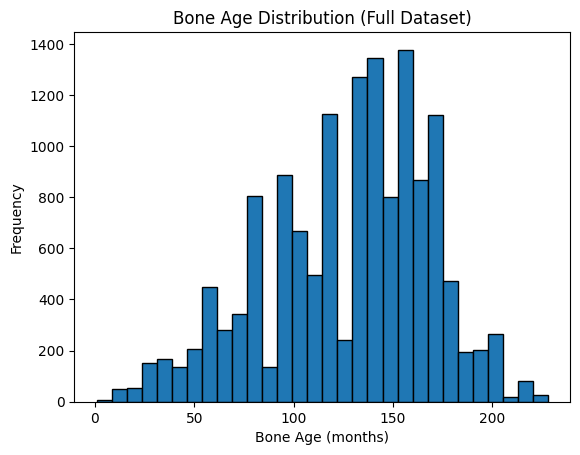

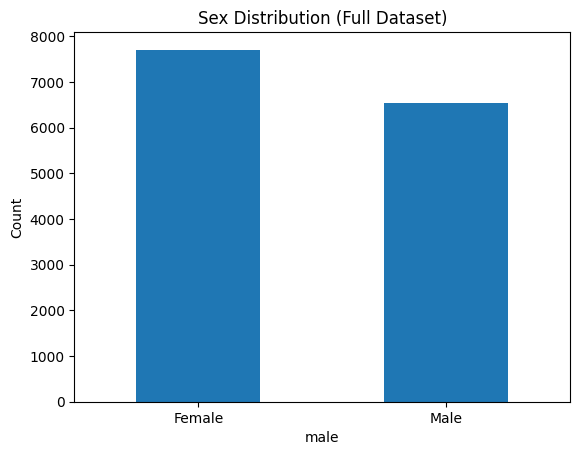

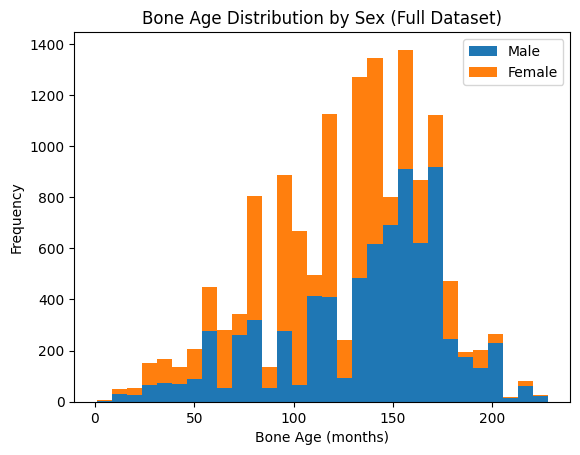

            case_id          male           age
count  14236.000000  14236.000000  14236.000000
mean    8494.500000      0.541304    127.371392
std     4109.723551      0.498309     41.265118
min     1377.000000      0.000000      1.000000
25%     4935.750000      0.000000     96.000000
50%     8494.500000      1.000000    132.000000
75%    12053.250000      1.000000    156.000000
max    15612.000000      1.000000    228.000000
male
1    7706
0    6530
Name: count, dtype: int64
case_id    0
male       0
age        0
dtype: int64
case_id      int64
male         int64
age        float64
dtype: object


In [6]:
full_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)

plt.hist(full_df['age'], bins=30, edgecolor='k')
plt.title('Bone Age Distribution (Full Dataset)')
plt.xlabel('Bone Age (months)')
plt.ylabel('Frequency')
plt.show()

full_df['male'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.title('Sex Distribution (Full Dataset)')
plt.ylabel('Count')
plt.show()

plt.hist([full_df[full_df['male'] == 1]['age'],
          full_df[full_df['male'] == 0]['age']],
         bins=30, label=['Male', 'Female'], stacked=True)
plt.title('Bone Age Distribution by Sex (Full Dataset)')
plt.xlabel('Bone Age (months)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Quick Summary Table
print(full_df.describe())
print(full_df['male'].value_counts())

# Check for Missing/Weird Values
print(full_df.isnull().sum())
print(full_df.dtypes)

## Building dataset

In [7]:
SIZE      = 256
batch_size = 64
CHANNELS   = 1

In [8]:
def image_generator(file_names, gender, age):
    for file_name, g, a in zip(file_names, gender, age):
        # 1) Read the PNG bytes from disk, decode as grayscale (1 channel):
        image = tf.io.decode_png(tf.io.read_file(file_name), channels=CHANNELS)
        # At this point `image` has dtype=tf.uint8 and shape (H, W, 1).
        yield image, g, a


def data_augmentation(image, gender, age):
    # 1) Normalize to [0,1]:
    image = tf.cast(image, tf.float32) / 255.0
    # 2) Cast labels to float32
    gender = tf.cast(gender, tf.float32)
    age    = tf.cast(age,    tf.float32)
    return image, gender, age


def split_input_label(image, gender, age):
    return (image, gender), age


def create_dataset(dataframe,augmentation_func,shuffle: bool,cache: bool,repeat: bool=True):
    # 1) from_generator: each row of `dataframe` is (image_path, male, age)
    ds = tf.data.Dataset.from_generator(
        image_generator,
        args=[
            dataframe.iloc[:, 0].values,  # array of image_path strings
            dataframe.iloc[:, 1].values,  # array of male ints
            dataframe.iloc[:, 2].values   # array of age floats
        ],
        output_signature=(
            tf.TensorSpec(shape=(None, None, CHANNELS), dtype=tf.uint8),  # raw decoded PNG
            tf.TensorSpec(shape=(), dtype=tf.int64),  # gender as int64
            tf.TensorSpec(shape=(), dtype=tf.float32) # age as float32
        )
    )

    # 2) map → data augmentation (resize to 256×256, cast to float32/255, cast labels to float32)
    ds = ds.map(augmentation_func, num_parallel_calls=tf.data.AUTOTUNE)

    # 3) map → split ((image, gender), age)
    ds = ds.map(split_input_label, num_parallel_calls=tf.data.AUTOTUNE)

    # 4) caching / shuffling / repeating / batching / prefetch
    if cache:
        # If you pass cache_name=None, it caches in memory;
        # if you pass a string, it caches to disk under that filename.
        ds = ds.cache()

    if shuffle:
        # Shuffle by full cardinality (not recommended for extremely large sets, but okay here):
        ds = ds.shuffle(buffer_size=ds.cardinality(),
                        reshuffle_each_iteration=True)

    if repeat:
        ds = ds.repeat()

    ds = ds.batch(batch_size, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds
    
#Creating dataset
train_dataset = create_dataset(
    training_dataframe,
    data_augmentation,
    shuffle=True,
    cache=True,
    repeat=True
)

validation_dataset = create_dataset(
    validation_dataframe,
    data_augmentation,
    shuffle=False,
    cache=True,
    repeat=False
)

test_dataset = create_dataset(
    test_dataframe,
    data_augmentation,
    shuffle=False,
    cache=False,
    repeat=False
)

I0000 00:00:1751209919.976010      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


## Image plotting

In [9]:
def plot_image(dataset, index):
    # Grab the first batch from 'dataset', then plot the `index`-th sample within that batch
    ds = dataset.take(1).get_single_element()  
    plt.imshow(ds[0][0][index], cmap='gray', interpolation='nearest')

    # ds[0][1][index] is 0.0 or 1.0
    gender = "FEMALE" if ds[0][1][index].numpy() == 0 else "MALE"
    plt.title(f"GENDER: {gender}, AGE: {ds[1][index].numpy()}")
    plt.axis('off')
    plt.show()
    print()
    return


def plot_metrics(history, metric, model_name):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    name = metric.replace('_', ' ')
    plt.title(f"Model {name.title()}")
    plt.ylabel(name.upper())
    plt.xlabel('epoch')
    plt.yscale('log')
    plt.legend(['train', 'val'], loc='center right')
    plt.show()
    return


def plot_loss(history, metric):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    name = metric.replace('_', ' ')
    plt.title(f"Model {name.title()}")
    plt.ylabel(name.upper())
    plt.xlabel('epoch')
    plt.yscale('log')
    plt.legend(['train', 'val'], loc='center right')
    plt.show()
    return

A sample of test set: 


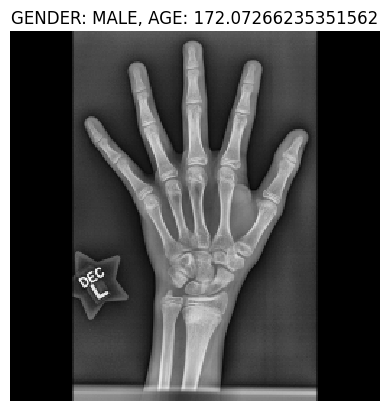


A sample of validation set: 


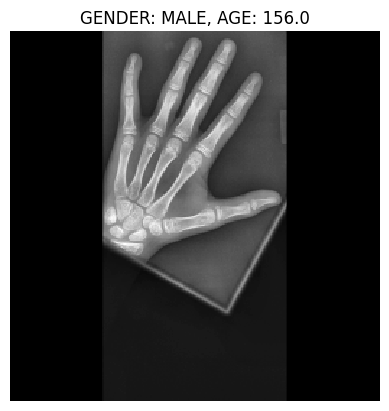


A sample of train set: 


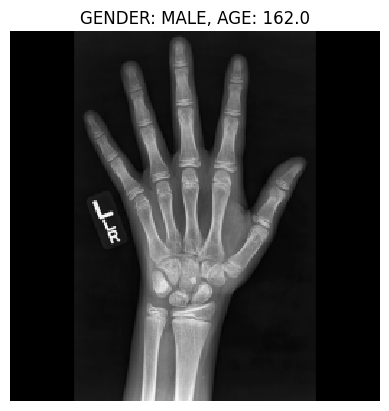

In [10]:
index = np.random.randint(0, batch_size, (1,))[0]

print('A sample of test set: ')
plot_image(test_dataset, index)

print('A sample of validation set: ')
plot_image(validation_dataset, index)

print('A sample of train set: ')
plot_image(train_dataset, index)

In [11]:
class EarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, monitor, threshold, max_epochs, patience=3):
        super(EarlyStopping, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.threshold = threshold
        self.best_weights = None
        self.max_epochs = max_epochs
        self.best_monitoring_value = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_monitoring_value = logs.get(self.monitor)
        if current_monitoring_value is None:
            raise ValueError(
                f"The metric {self.monitor} is not available in logs for early stopping.")
        if epoch >= self.max_epochs-1:
            print(
                f"\n--- Early stopping: Reached maximum number of epochs : {self.max_epochs} \n")
            self.model.stop_training = True
            self.model.set_weights(self.best_weights)
            return
        if current_monitoring_value < self.best_monitoring_value:
            self.best_weights = self.model.get_weights()
            self.best_monitoring_value = current_monitoring_value
        if current_monitoring_value > self.threshold:
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(
                    f"\n--- Early stopping: {self.monitor} has been below {self.threshold} for {self.patience} epochs.\n")
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)
                return

In [12]:
class TotalTimeMemoryCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.total_time = 0
        self.total_memory = 0

    def on_train_begin(self, logs=None):
        self.train_time_start = time.time()
        self.train_memory_start = psutil.Process().memory_info().rss / (1024 ** 2)

    def on_train_end(self, logs=None):
        self.total_time = (time.time() - self.train_time_start) / 60
        self.total_memory = (psutil.Process().memory_info(
        ).rss / (1024 ** 2)) - self.train_memory_start
        print(
            f"Training - Total time: {self.total_time:.4f} minutes, Total memory used: {self.total_memory:.4f} MB")

    def on_epoch_end(self, epoch, logs=None):
        epoch_time = (time.time() - self.train_time_start) / 60
        epoch_memory = (psutil.Process().memory_info().rss /
                        (1024 ** 2)) - self.train_memory_start
        print(
            f"Epoch {epoch + 1} - Time elapsed: {epoch_time:.4f} minutes, Memory used: {epoch_memory:.4f} MB")

# **First approach**

**DenseNet-121 For Bone Age Prediction**

In this approach, we implemented DenseNet-121 from scratch for the regression task.

In [13]:
class DenseNet121:
    def __init__(self,activation):
        self.activation = activation
        
    def __conv_block(self, x, growth_rate):
        x1 = tf.keras.layers.BatchNormalization()(x)
        x1 = tf.keras.layers.Activation(self.activation)(x1)
        x1 = tf.keras.layers.Conv2D(4 * growth_rate, (1, 1), strides=(1, 1), padding='same',
                                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=1e-4))(x1)
        x1 = tf.keras.layers.BatchNormalization()(x1)
        x1 = tf.keras.layers.Activation(self.activation)(x1)
        x1 = tf.keras.layers.Conv2D(growth_rate, (3, 3), strides=(
            1, 1), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=1e-4))(x1)
        return tf.keras.layers.Concatenate(axis=-1)([x, x1])

    def __dense_block(self, x, blocks, growth_rate):
        for _ in range(blocks):
            x = self.__conv_block(x, growth_rate)
        return x

    def __transition_block(self, x, reduction):
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation(self.activation)(x)
        x = tf.keras.layers.Conv2D(int(x.shape[-1] * reduction), (1, 1), strides=(
            1, 1), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=1e-4))(x)
        return tf.keras.layers.AveragePooling2D((2, 2), strides=(2, 2))(x)

    def __DenseNet121(self, input_shape):
        input_layer = tf.keras.layers.Input(
            shape=input_shape, name='image_input')

        x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', kernel_initializer='he_normal',
                                   kernel_regularizer=tf.keras.regularizers.L2(l2=1e-4))(input_layer)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation(self.activation)(x)
        x = tf.keras.layers.MaxPooling2D(
            (3, 3), strides=(2, 2), padding='same')(x)

        x = self.__dense_block(x, 6, 32)
        x = self.__transition_block(x, 0.5)

        x = self.__dense_block(x, 12, 32)
        x = self.__transition_block(x, 0.5)

        x = self.__dense_block(x, 24, 32)
        x = self.__transition_block(x, 0.5)

        x = self.__dense_block(x, 16, 32)

        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation(self.activation)(x)
        x = tf.keras.layers.GlobalAveragePooling2D()(x)

        return tf.keras.models.Model(inputs=input_layer, outputs=x, name='DenseNet121')

    def build_model(self, input_shape):
        base_model = self.__DenseNet121(input_shape=input_shape)

        gender_input = tf.keras.layers.Input(shape=(1,), name='gender_input')
        gender_processed = tf.keras.layers.Dense(
            16, activation=self.activation)(gender_input)
        gender_processed = tf.keras.layers.Dense(
            8, activation=self.activation)(gender_processed)
        concatenated = tf.keras.layers.Concatenate()(
            [base_model.output, gender_processed])

        fc = tf.keras.layers.Dense(
            32, activation=self.activation, kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(concatenated)
        fc = tf.keras.layers.Dense(
            16, activation=self.activation, kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(fc)
        fc = tf.keras.layers.Dropout(rate=0.01)(fc)
        fc = tf.keras.layers.Dense(1, activation='linear')(fc)
        
        return tf.keras.models.Model(inputs=[base_model.input, gender_input], outputs=fc, name='DenseNet121_Regressor')

In [14]:
densenet = DenseNet121(activation='gelu').build_model(input_shape=(SIZE, SIZE, CHANNELS))
densenet.summary()

Model: "DenseNet121_Regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          3,200 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ max_pooling2d[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 64, 64, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 128)    │          8,320 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 128)    │            512 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 64, 64, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 32)     │         36,896 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 96)     │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 96)     │            384 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 64, 64, 96)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │         12,416 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 64, 64, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 7,075,241 (26.99 MB)

 Trainable params: 6,991,593 (26.67 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [15]:
number_of_epochs = 60

early_stopping = EarlyStopping(monitor='val_mean_absolute_error',
                               threshold=8,
                               max_epochs=number_of_epochs,
                               patience=3)


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_densenet.keras',
    monitor='val_mean_absolute_error',
    mode='min',
    save_best_only=True,
    verbose=1)

In [16]:
class CosineWarmUpAndDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, decay_steps, warmup_steps, alpha=0.0):
        self.initial_learning_rate = initial_learning_rate
        self.decay_steps = decay_steps
        self.warmup_steps = warmup_steps
        self.alpha = alpha
        self.pi = tf.constant(np.pi, dtype=tf.float32)
    
    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        cosine_warmup = 0.5 * (1 - tf.cos(self.pi * step / self.warmup_steps))  # cosine increase
        cosine_decay = 0.5 * (1 + tf.cos(self.pi * (step - self.warmup_steps) / (self.decay_steps - self.warmup_steps)))
        # Cosine Warm-up: Increase learning rate with cosine function for warm-up steps
        warmup_lr = self.initial_learning_rate * cosine_warmup
        # Cosine Decay: After warm-up, apply cosine decay
        decayed_lr = (self.initial_learning_rate - self.initial_learning_rate * self.alpha) * cosine_decay + self.initial_learning_rate * self.alpha
        # Return learning rate based on whether the step is in warmup phase or decay phase
        return tf.cond(step < self.warmup_steps, lambda: warmup_lr, lambda: decayed_lr)

    # Add the get_config() method to enable serialization
    def get_config(self):
        config = {
            'initial_learning_rate': self.initial_learning_rate,
            'decay_steps': self.decay_steps,
            'warmup_steps': self.warmup_steps,
            'alpha': self.alpha
        }
        return config
        
#Train step
train_steps = int(np.ceil(len(training_dataframe) / batch_size))

# Define parameters for learning rate schedule
initial_learning_rate = 5e-3  

# Set warmup steps (e.g., 20% of the total steps)
warmup_steps = int(0.2 * train_steps * number_of_epochs)

# Initialize the learning rate schedule
learning_rate_schedule = CosineWarmUpAndDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=train_steps * number_of_epochs,
    warmup_steps=warmup_steps,
    alpha=0.0
)

# Compile the model 
densenet.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate_schedule, weight_decay=0.01),
    loss=tf.keras.losses.Huber(delta=15),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.R2Score()
    ]
)

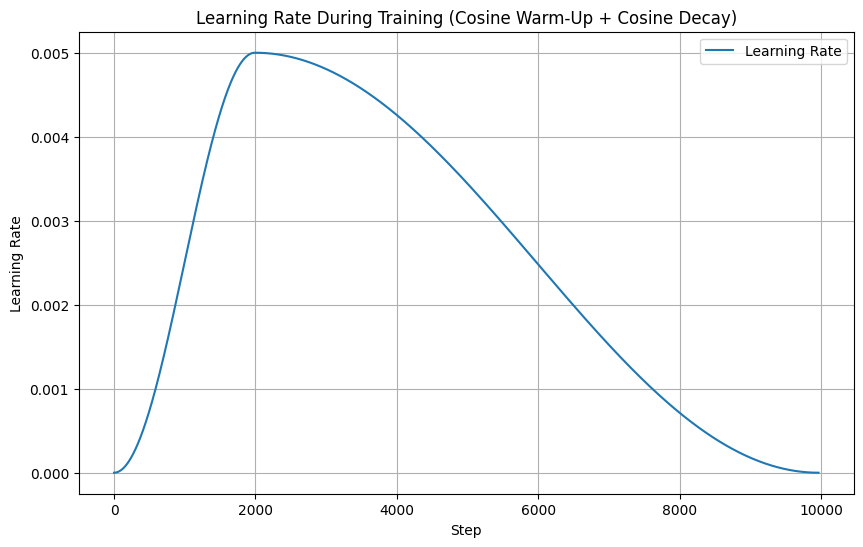

In [17]:
# Simulate the learning rate behavior
learning_rates = []
steps = np.arange(0, train_steps * number_of_epochs)  # Range of steps

for step in steps:
    lr = learning_rate_schedule(step)  # Get learning rate for the current step
    learning_rates.append(lr.numpy())  # Convert the tensor to a numpy value

# Plotting the Learning Rate over Epochs
plt.figure(figsize=(10, 6))
plt.plot(steps, learning_rates, label='Learning Rate')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate During Training (Cosine Warm-Up + Cosine Decay)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
time_memory_callback = TotalTimeMemoryCallback()

densenet_history = densenet.fit(train_dataset,
                                epochs=number_of_epochs,
                                steps_per_epoch=train_steps,
                                validation_data=validation_dataset,
                                callbacks=[checkpoint, early_stopping,
                                           time_memory_callback],
                                verbose='auto')

Epoch 1/60


I0000 00:00:1751196121.710376     123 service.cc:148] XLA service 0x7f2d01950f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751196121.711200     123 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751196138.062299     123 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1751196245.516355     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - loss: 1787.7939 - mean_absolute_error: 126.4905 - r2_score: -9.2090 - root_mean_squared_error: 133.1740
Epoch 1: val_mean_absolute_error improved from inf to 108.08429, saving model to best_model_densenet.keras


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Epoch 1 - Time elapsed: 6.6005 minutes, Memory used: 4474.7344 MB
166/166 ━━━━━━━━━━━━━━━━━━━━ 396s 588ms/step - loss: 1787.5790 - mean_absolute_error: 126.4762 - r2_score: -9.2080 - root_mean_squared_error: 133.1596 - val_loss: 1512.6558 - val_mean_absolute_error: 108.0843 - val_r2_score: -6.7066 - val_root_mean_squared_error: 115.7832
Epoch 2/60
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - loss: 1439.3456 - mean_absolute_error: 103.1785 - r2_score: -6.3007 - root_mean_squared_error: 111.7571
Epoch 2: val_mean_absolute_error improved from 108.08429 to 57.60390, saving model to best_model_densenet.keras
Epoch 2 - Time elapsed: 7.6930 minutes, Memory used: 4672.8320 MB
166/166 ━━━━━━━━━━━━━━━━━━━━ 66s 395ms/step - loss: 1437.4800 - mean_absolute_error: 103.0531 - r2_score: -6.2885 - root_mean_squared_error: 111.6553 - val_loss: 760.0497 - val_mean_absolute_error: 57.6039 - val_r2_score: -1.7622 - val_root_mean_squared_error: 69.3172
Epoch 3/60
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step 

In [19]:
print(f"Total training time: {time_memory_callback.total_time:.4f} minutes")
print(f"Total memory usage: {time_memory_callback.total_memory:.4f} MB")

Total training time: 69.4273 minutes
Total memory usage: 6277.7656 MB


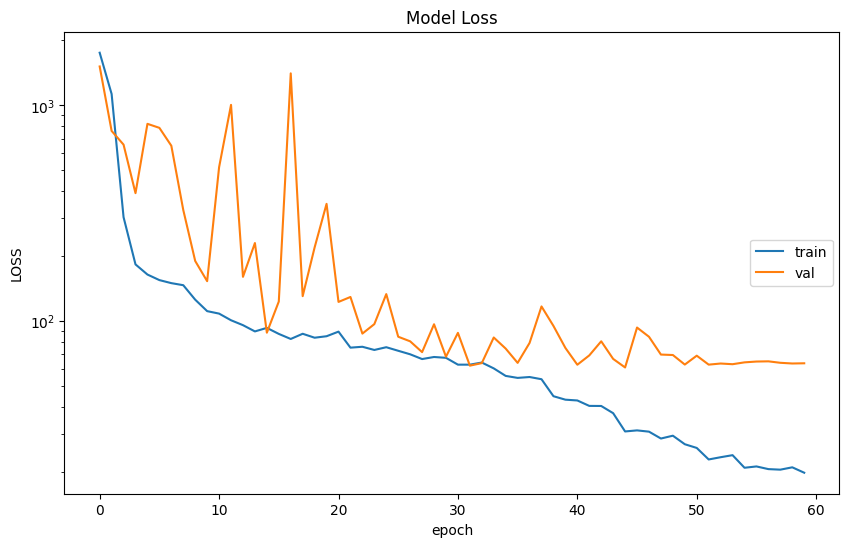

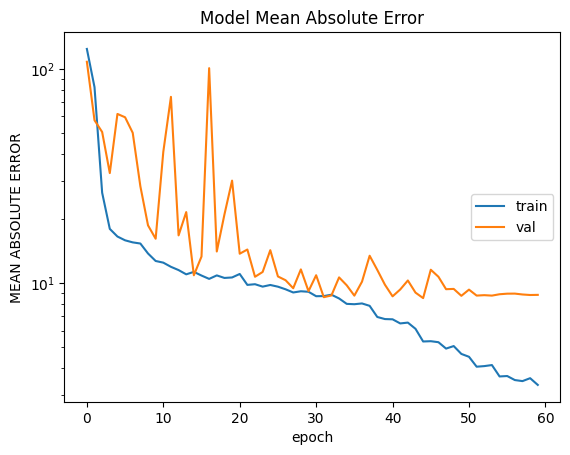

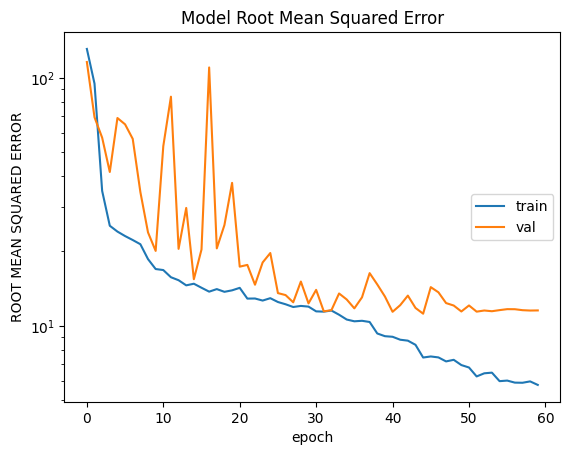

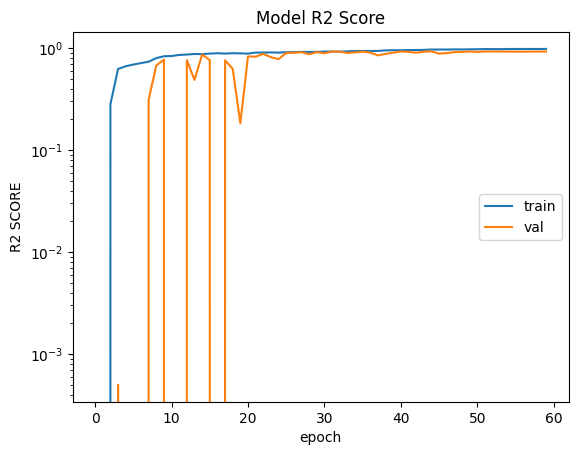

In [20]:
plot_loss(densenet_history, 'loss')
plot_metrics(densenet_history, 'mean_absolute_error', model_name='DenseNet121')
plot_metrics(densenet_history, 'root_mean_squared_error',
             model_name='DenseNet121')
plot_metrics(densenet_history, 'r2_score', model_name='DenseNet121')

In [21]:
densenet_score = densenet.evaluate(test_dataset, verbose='auto')
print("DenseNet regressor evaluation results:\n")
print('Testset Loss = {:.5f}'.format(densenet_score[0]))
print('Testset MAE = {:.2f}'.format(densenet_score[1]))
print('Testset RMSE = {:.2f}'.format(densenet_score[2]))
print('Testset R2Score = {:.2f}'.format(densenet_score[3]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - loss: 62.0978 - mean_absolute_error: 8.5967 - r2_score: 0.9308 - root_mean_squared_error: 11.2316
DenseNet regressor evaluation results:

Testset Loss = 65.06216
Testset MAE = 8.84
Testset RMSE = 11.55
Testset R2Score = 0.93


# **Second Approach**

**ResNet34+CBAM For Bone Age Prediction**

In this approach, we implemented DenseNet-121 from scratch for the regression task.

In [13]:
@tf.keras.utils.register_keras_serializable()
class SpatialChannelPooling(tf.keras.layers.Layer):
    """Exact replacement for Lambda layers in spatial attention"""
    def __init__(self, **kwargs):
        super(SpatialChannelPooling, self).__init__(**kwargs)
    
    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)
        return tf.concat([avg_pool, max_pool], axis=-1)
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], input_shape[2], 2)
    
    def get_config(self):
        return super().get_config()
        



class ResNet34CBAM:
    def __init__(self, activation):
        self.activation = activation
        # Shared MLP for channel attention (as per CBAM paper)
        self.channel_mlp = None

    def __conv_block(self, x, filters, k, strides=1):
        x = tf.keras.layers.Conv2D(filters, k, strides=strides, padding='same', use_bias=False, kernel_initializer='he_normal')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        return tf.keras.layers.Activation(self.activation)(x)
        

    def __basic_block(self, x, filters, strides=1):
        sh = x
        
        # Main path with CBAM applied to residual branch
        # conv 1
        x = tf.keras.layers.Conv2D(filters, 3, strides=strides, padding='same', use_bias=False, kernel_initializer='he_normal')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation(self.activation)(x)
        
        # conv 2
        x = tf.keras.layers.Conv2D(filters, 3, strides=1, padding='same', use_bias=False, kernel_initializer='he_normal')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = self.__enhanced_channel_attention(x, filters)   
        x = self.__spatial_attention(x)                      
        
        # shortcut connection
        if strides != 1 or sh.shape[-1] != filters:
            sh = tf.keras.layers.Conv2D(filters, 1, strides=strides, padding='same', use_bias=False, kernel_initializer='he_normal')(sh)
            sh = tf.keras.layers.BatchNormalization()(sh)
        
        # Residual addition
        x = tf.keras.layers.Add()([x, sh])
        return tf.keras.layers.Activation(self.activation)(x)
        

    def __resnet_block(self, x, filters, reps, strides):
        x = self.__basic_block(x, filters, strides=strides)
        for _ in range(reps - 1):
            x = self.__basic_block(x, filters, strides=1)
        return x
        
    
    def __enhanced_channel_attention(self, x, filters, reduction_ratio=8):
        """
        Enhanced Channel Attention Module based on bone age prediction literature
        - Reduced reduction ratio from 16 to 8 for better feature representation
        - Added SE-style refinement for medical imaging (Chen et al. 2021)
        """
        # Create shared MLP if not exists (for this filter size)
        if self.channel_mlp is None or self.channel_mlp.layers[0].units != filters // reduction_ratio:
            self.channel_mlp = tf.keras.models.Sequential([
                tf.keras.layers.Dense(filters // reduction_ratio, activation='relu', use_bias=False),
                tf.keras.layers.Dense(filters, activation=None, use_bias=False)
            ])
        
        # Global pooling (original CBAM)
        avg_pool = tf.keras.layers.GlobalAveragePooling2D()(x)
        max_pool = tf.keras.layers.GlobalMaxPooling2D()(x)
        
        # Shared MLP
        avg_out = self.channel_mlp(avg_pool)
        max_out = self.channel_mlp(max_pool)
        
        # Element-wise sum and sigmoid
        channel_attention = tf.keras.layers.Add()([avg_out, max_out])
        channel_attention = tf.keras.layers.Activation('sigmoid')(channel_attention)
        channel_attention = tf.keras.layers.Reshape((1, 1, filters))(channel_attention)
        
        # Apply channel attention
        x_attended = tf.keras.layers.Multiply()([x, channel_attention])
        
        # SE-style refinement for medical imaging (literature enhancement)
        se_feature = tf.keras.layers.GlobalAveragePooling2D()(x_attended)
        se_feature = tf.keras.layers.Dense(filters // 4, activation='relu')(se_feature)
        se_feature = tf.keras.layers.Dense(filters, activation='sigmoid')(se_feature)
        se_feature = tf.keras.layers.Reshape((1, 1, filters))(se_feature)
        
        # Final refinement
        x_refined = tf.keras.layers.Multiply()([x_attended, se_feature])
        return x_refined
        
    
    def __spatial_attention(self, x, kernel_size=7):
        """
        Spatial Attention Module as per CBAM paper
        - Uses 7x7 convolution (default)
        - Concatenates channel-wise avg and max pooling
        """   
        # Concatenate and apply convolution
        concat = SpatialChannelPooling()(x)
        spatial_attention = tf.keras.layers.Conv2D(
            1, kernel_size, padding='same', activation='sigmoid', 
            use_bias=False, kernel_initializer='he_normal'
        )(concat)
        
        return tf.keras.layers.Multiply()([x, spatial_attention])

    def __multi_scale_pooling(self, x):
        """
        Multi-scale feature extraction for bone age prediction
        Based on Halabi et al. 2019 - captures features at different scales
        """
        # Scale 1: Global average pooling (original)
        global_avg = tf.keras.layers.GlobalAveragePooling2D()(x)
        
        # Scale 2: Adaptive pooling at different resolutions
        pool_2x2 = tf.keras.layers.AveragePooling2D(pool_size=2, padding='same')(x)
        pool_2x2 = tf.keras.layers.GlobalAveragePooling2D()(pool_2x2)
        
        # Scale 3: Adaptive pooling for larger structures
        pool_4x4 = tf.keras.layers.AveragePooling2D(pool_size=4, padding='same')(x)
        pool_4x4 = tf.keras.layers.GlobalAveragePooling2D()(pool_4x4)
        
        # Concatenate multi-scale features
        multi_scale = tf.keras.layers.Concatenate()([global_avg, pool_2x2, pool_4x4])
        return multi_scale

    def __region_aware_pooling(self, x):
        """
        Region-aware feature extraction for anatomical structures
        Based on Bui et al. 2020 - focuses on important bone regions
        """
        # Generate attention map for anatomical regions
        attention_conv = tf.keras.layers.Conv2D(1, 3, padding='same', activation='sigmoid', 
                                              kernel_initializer='he_normal')(x)
        
        # Weighted global average pooling
        weighted_features = tf.keras.layers.Multiply()([x, attention_conv])
        region_pool = tf.keras.layers.GlobalAveragePooling2D()(weighted_features)
        
        return region_pool

    def __enhanced_gender_processing(self, gender_input):
        """
        Enhanced gender feature processing based on recent literature
        Better integration with image features for bone age prediction
        """
        # Multi-layer gender processing with dropout for regularization
        gender_features = tf.keras.layers.Dense(32, activation=self.activation)(gender_input)
        gender_features = tf.keras.layers.Dropout(0.05)(gender_features)
        gender_features = tf.keras.layers.Dense(16, activation=self.activation)(gender_features)
        gender_features = tf.keras.layers.Dropout(0.02)(gender_features)
        gender_features = tf.keras.layers.Dense(8, activation=self.activation)(gender_features)
        
        return gender_features

    def build_model(self, input_shape):
        img = tf.keras.layers.Input(input_shape, name='image_input')
        gen = tf.keras.layers.Input((1,), name='gender_input')
        
        # Enhanced gender processing based on literature
        gender_processed = self.__enhanced_gender_processing(gen)
    
        # Stem (ResNet34 standard) with light data augmentation
        x = self.__conv_block(img, 64, 7, strides=2)
        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same')(x)
        
        # ResNet-34 blocks with enhanced CBAM
        x = self.__resnet_block(x,  64, reps=3, strides=1)
        x = self.__resnet_block(x, 128, reps=4, strides=2)
        x = self.__resnet_block(x, 256, reps=6, strides=2)
        x = self.__resnet_block(x, 512, reps=3, strides=2)
        
        # Multi-scale feature extraction (literature-based enhancement)
        multi_scale_features = self.__multi_scale_pooling(x)
        region_features = self.__region_aware_pooling(x)
        
        # Combine different feature representations
        combined_features = tf.keras.layers.Concatenate()([multi_scale_features, region_features])
    
        # Enhanced classification head with improved regularization
        x = tf.keras.layers.Concatenate()([combined_features, gender_processed])
        
        # Deeper classification head with progressive dropout (literature recommendation)
        x = tf.keras.layers.Dense(256, activation=self.activation, 
                                 kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        
        x = tf.keras.layers.Dense(128, activation=self.activation,
                                 kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x = tf.keras.layers.Dropout(0.15)(x)
        
        x = tf.keras.layers.Dense(64, activation=self.activation)(x)
        x = tf.keras.layers.Dropout(0.1)(x)
        
        out = tf.keras.layers.Dense(1, activation='linear', name='bone_age')(x)
    
        return tf.keras.models.Model([img, gen], out, name='ResNet34CBAM_Enhanced')

In [14]:
resnet = ResNet34CBAM(activation='gelu').build_model(input_shape=(SIZE, SIZE, CHANNELS))
resnet.summary()

Model: "ResNet34CBAM_Enhanced"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          3,136 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         36,864 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 64, 64, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         36,864 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 64)             │              0 │ batch_normalization_2… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d      │ (None, 64)             │              0 │ batch_normalization_2… │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 64)             │          1,024 │ global_average_poolin… │
│                           │                        │                │ global_max_pooling2d[… │
│                           │                        │                │ global_average_poolin… │
│                           │                        │                │ global_max_pooling2d_… │
│                           │                        │                │ global_average_poolin… │
│                           │                        │                │ global_max_pooling2d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64)             │              0 │ sequential[0][0],      │
│                      

 Total params: 22,590,634 (86.18 MB)

 Trainable params: 22,573,610 (86.11 MB)

 Non-trainable params: 17,024 (66.50 KB)

In [15]:
number_of_epochs = 60

early_stopping = EarlyStopping(monitor='val_mean_absolute_error',
                               threshold=8,
                               max_epochs=number_of_epochs,
                               patience=3)


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_resnet.keras',
    monitor='val_mean_absolute_error',
    mode='min',
    save_best_only=True,
    verbose=1)

In [16]:
class CosineWarmUpAndDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, decay_steps, warmup_steps, alpha=0.0):
        self.initial_learning_rate = initial_learning_rate
        self.decay_steps = decay_steps
        self.warmup_steps = warmup_steps
        self.alpha = alpha
        self.pi = tf.constant(np.pi, dtype=tf.float32)
    
    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        
        cosine_warmup = 0.5 * (1 - tf.cos(self.pi * step / self.warmup_steps))  # cosine increase
        cosine_decay = 0.5 * (1 + tf.cos(self.pi * (step - self.warmup_steps) / (self.decay_steps - self.warmup_steps)))

        # Cosine Warm-up: Increase learning rate with cosine function for warm-up steps
        warmup_lr = self.initial_learning_rate * cosine_warmup
        # Cosine Decay: After warm-up, apply cosine decay
        decayed_lr = (self.initial_learning_rate - self.initial_learning_rate * self.alpha) * cosine_decay + self.initial_learning_rate * self.alpha

        # Return learning rate based on whether the step is in warmup phase or decay phase
        return tf.cond(step < self.warmup_steps, lambda: warmup_lr, lambda: decayed_lr)

    # Add the get_config() method to enable serialization
    def get_config(self):
        config = {
            'initial_learning_rate': self.initial_learning_rate,
            'decay_steps': self.decay_steps,
            'warmup_steps': self.warmup_steps,
            'alpha': self.alpha
        }
        return config

train_steps = int(np.ceil(len(training_dataframe) / batch_size))

# Define parameters for learning rate schedule
initial_learning_rate = 5e-3  

# Set warmup steps (e.g., 10% of the total steps)
warmup_steps = int(0.1 * train_steps * number_of_epochs)

# Initialize the learning rate schedule
learning_rate_schedule = CosineWarmUpAndDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=train_steps * number_of_epochs,
    warmup_steps=warmup_steps,
    alpha=0.0
)

# Compile the model with the new learning rate schedule
resnet.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate_schedule, weight_decay=0.01),
    loss=tf.keras.losses.Huber(delta=15),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.R2Score()
    ]
)

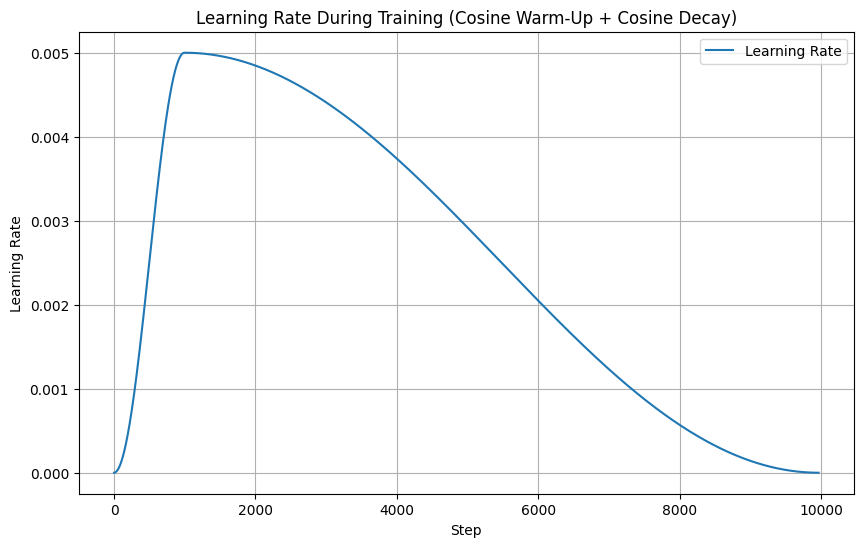

In [17]:
# Simulate the learning rate behavior
learning_rates = []
steps = np.arange(0, train_steps * number_of_epochs) 

for step in steps:
    lr = learning_rate_schedule(step)  
    learning_rates.append(lr.numpy())  

plt.figure(figsize=(10, 6))
plt.plot(steps, learning_rates, label='Learning Rate')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate During Training (Cosine Warm-Up + Cosine Decay)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
time_memory_callback = TotalTimeMemoryCallback()

resnet_history = resnet.fit(train_dataset,
                                epochs=number_of_epochs,
                                steps_per_epoch=train_steps,
                                validation_data=validation_dataset,
                                callbacks=[checkpoint, early_stopping,
                                           time_memory_callback],
                                verbose='auto')

Epoch 1/60


I0000 00:00:1751210092.257289      97 service.cc:148] XLA service 0x7b2aa80082b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751210092.258122      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751210099.677766      97 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1751210125.165915      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 1585.8691 - mean_absolute_error: 113.0890 - r2_score: -7.8397 - root_mean_squared_error: 123.2711
Epoch 1: val_mean_absolute_error improved from inf to 137.13242, saving model to best_model_resnet.keras


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Epoch 1 - Time elapsed: 2.7286 minutes, Memory used: 2605.6602 MB
166/166 ━━━━━━━━━━━━━━━━━━━━ 164s 333ms/step - loss: 1583.0236 - mean_absolute_error: 112.8978 - r2_score: -7.8213 - root_mean_squared_error: 123.1261 - val_loss: 1945.1261 - val_mean_absolute_error: 137.1324 - val_r2_score: -10.8222 - val_root_mean_squared_error: 143.4042
Epoch 2/60
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 311.9848 - mean_absolute_error: 27.3331 - r2_score: 0.2563 - root_mean_squared_error: 35.6029
Epoch 2: val_mean_absolute_error improved from 137.13242 to 50.12032, saving model to best_model_resnet.keras
Epoch 2 - Time elapsed: 3.3894 minutes, Memory used: 2849.6758 MB
166/166 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - loss: 311.8297 - mean_absolute_error: 27.3223 - r2_score: 0.2567 - root_mean_squared_error: 35.5909 - val_loss: 648.3746 - val_mean_absolute_error: 50.1203 - val_r2_score: -1.8383 - val_root_mean_squared_error: 70.2649
Epoch 3/60
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 2

In [19]:
print(f"Total training time: {time_memory_callback.total_time:.4f} minutes")
print(f"Total memory usage: {time_memory_callback.total_memory:.4f} MB")

Total training time: 40.0772 minutes
Total memory usage: 4140.0742 MB


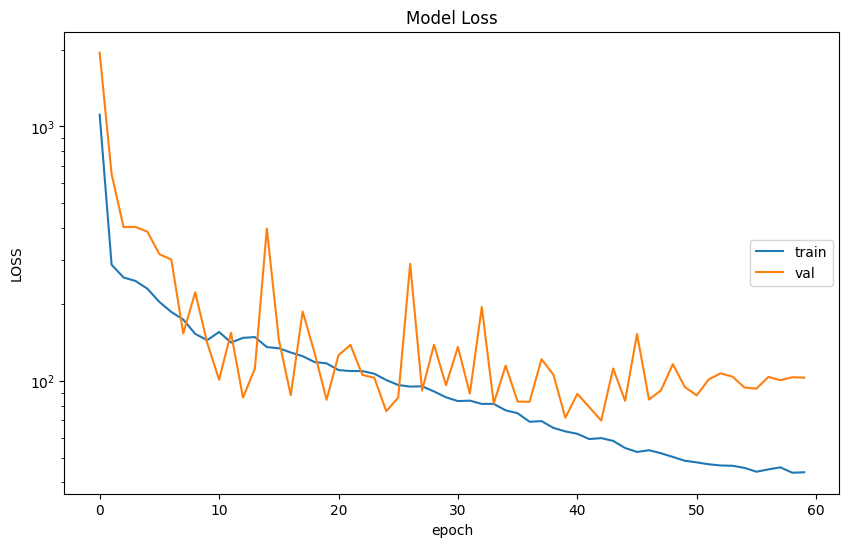

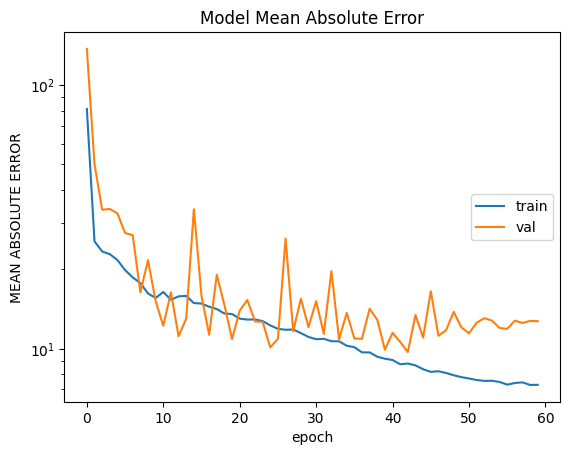

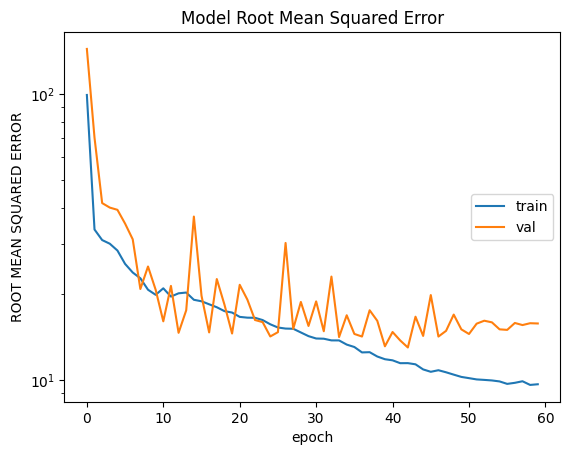

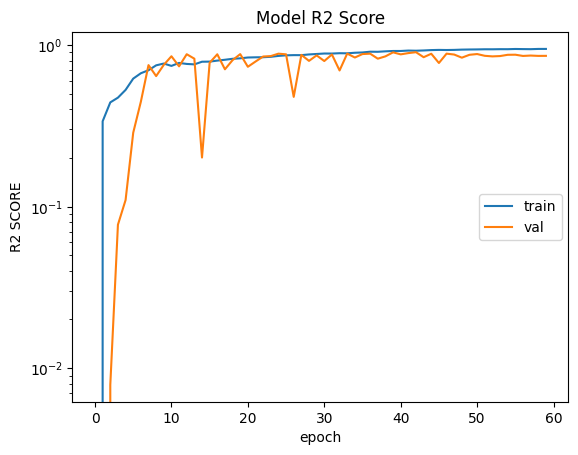

In [20]:
plot_loss(resnet_history, 'loss')
plot_metrics(resnet_history, 'mean_absolute_error',model_name='ResNet34CBAM_Enhanced')
plot_metrics(resnet_history, 'root_mean_squared_error',model_name='ResNet34CBAM_Enhanced')
plot_metrics(resnet_history, 'r2_score',model_name='ResNet34CBAM_Enhanced')

In [21]:
test_res = resnet.evaluate(test_dataset, verbose='auto')
print(f"\nResNet+CBAM Test Results:\n"
      f" MAE  = {test_res[1]:.2f}\n"
      f" RMSE = {test_res[2]:.2f}\n"
      f" R²   = {test_res[3]:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 70.6143 - mean_absolute_error: 9.7704 - r2_score: 0.9063 - root_mean_squared_error: 13.0196

ResNet+CBAM Test Results:
 MAE  = 10.24
 RMSE = 13.90
 R²   = 0.90


**Conclusion:** DenseNet-121 outperformed Resnet34+CBAM with lower loss, MAE, RMSE and higher R2Score.